# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *yfinance*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *yfinance*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install conda-forge::yfinance*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado yfinance

**Alternativa**: `!pip install yfinance`

In [5]:
!pip install yfinance
import yfinance as yf

Primero importaremos datos desde un archivo con extensión `.csv`

In [10]:
import pandas as pd

In [12]:
data=pd.read_csv("FB.csv")

In [13]:
data=data[["Date","Adj Close"]]
data 

,Date,Adj Close
0,2015-01-02,78.449997
1,2015-01-05,77.190002
2,2015-01-06,76.150002
3,2015-01-07,76.150002
4,2015-01-08,78.180000
...,...,...
1001,2018-12-24,124.059998
1002,2018-12-26,134.179993
1003,2018-12-27,134.520004
1004,2018-12-28,133.199997


Ahora lo haremos desde Yahoo Finance

In [14]:
web.DataReader?

Object `web.DataReader` not found.


In [15]:
tickers=["AAPL","META","MSFT"]
for ticker in tickers:
    yf.download(ticker, start="2020-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


#### La api de yahoo es inestable. Puede ser que nos toque intentar varias veces antes de tener éxito

In [16]:
aapl=yf.download("AAPL", start="2020-01-01", end="2024-01-01")
aapl=aapl[["Adj Close","Volume"]]

[*********************100%%**********************]  1 of 1 completed


In [17]:
aapl.describe()

,Adj Close,Volume
count,1006.000000,1.006000e+03
mean,139.213527,9.895211e+07
std,33.661414,5.439653e+07
min,54.706993,2.404830e+07
25%,121.492741,6.407675e+07
50%,144.116127,8.467540e+07
75%,164.680252,1.155069e+08
max,197.857529,4.265100e+08


<Axes: xlabel='Date'>

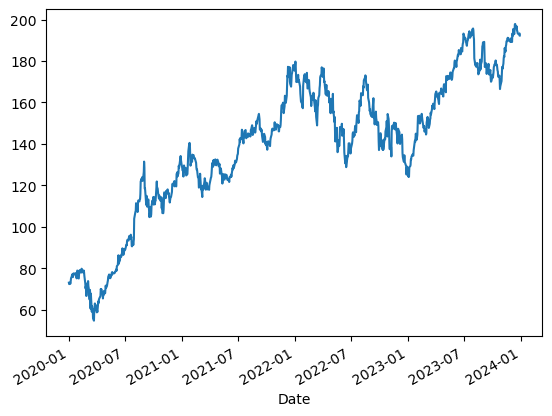

In [18]:
aapl["Adj Close"].plot()

<Axes: >

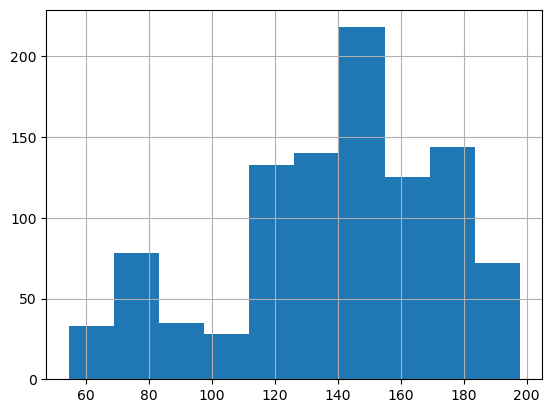

In [19]:
aapl["Adj Close"].hist()

¿Cómo lucen estos datos?

<Axes: ylabel='Frequency'>

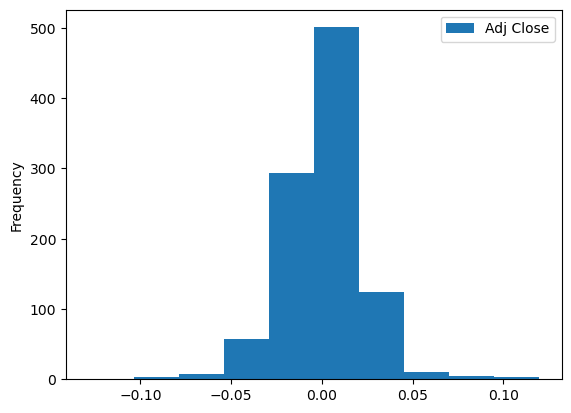

In [20]:
R_aapl= aapl.pct_change()[["Adj Close"]].dropna()
R_aapl.plot.hist()

In [21]:
R_aapl.describe()

,Adj Close
count,1005.000000
mean,0.001187
std,0.021146
min,-0.128647
25%,-0.009127
50%,0.000988
75%,0.012743
max,0.119808


(array([ 36., 281., 482., 191.,  15.]),
 array([-0.06469807, -0.03667276, -0.00864746,  0.01937785,  0.04740315,
         0.07542845]),
 <BarContainer object of 5 artists>)

<Figure size 640x480 with 0 Axes>

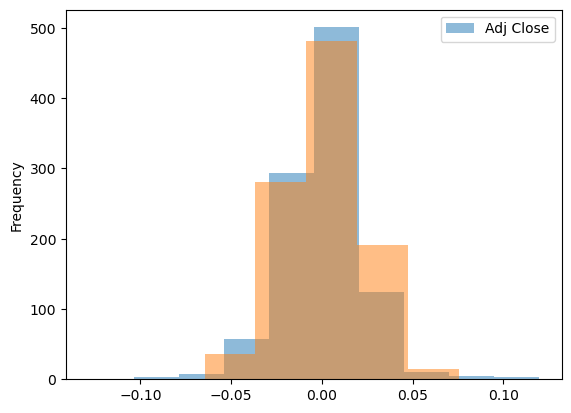

In [46]:
import numpy as np
import matplotlib.pyplot as plt
sim_R=np.random.normal(R_aapl.mean(),R_aapl.std(),1005)
plt.figure()
R_aapl.plot.hist(alpha=0.5)
plt.hist(sim_R, alpha=0.5,bins=5)

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [63]:
sim_R=pd.DataFrame(sim_R)
sim_R.describe()

,0
count,1005.000000
mean,0.001715
std,0.020893
min,-0.064698
25%,-0.012915
50%,0.001899
75%,0.016312
max,0.075428


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [69]:
pct=R_aapl.pct_change()
pct

,Adj Close
Date,
2020-01-03,NaN
2020-01-06,-1.819603
2020-01-07,-1.590262
2020-01-08,-4.420175
2020-01-09,0.320387
...,...
2023-12-22,6.204549
2023-12-26,-0.487886
2023-12-27,-1.182301


y la gráfica de los rendimientos se puede obtener como...

<Axes: xlabel='Date'>

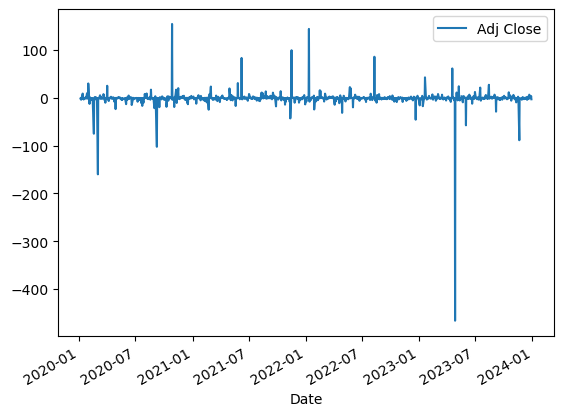

In [70]:
pct.plot()

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.


Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [71]:
import numpy as np
r_aapl = np.log(aapl/aapl.shift()).dropna()

In [72]:
m=R_aapl.mean()
s=R_aapl.std()
simulacion_aapl=pd.DataFrame(np.random.normal(m,s,(5,100000)))
simulacion_aapl
m1=r_aapl.mean()
s1=r_aapl.std()

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [80]:
def simR(media, std, start, dias, N):
    sim = np.random.normal(media, std, size=(dias, N)) + 1
    fechas=pd.date_range(start, periods=dias)
    return pd.DataFrame(sim, index=fechas)
    
simi=simR(0.001187, 0.021146, "2020-01-01", 10,10)
simi

,0,1,2,3,4,5,6,7,8,9
2020-01-01,1.008237,1.014909,0.994565,0.997606,0.995276,1.021557,0.973670,0.998338,1.031976,0.999772
2020-01-02,0.993125,0.965077,0.987551,0.942835,1.002983,1.004989,1.011895,1.001816,1.019435,0.972651
2020-01-03,1.025827,1.031626,0.992762,1.012037,0.998278,1.032482,1.020116,0.998604,1.004395,1.034202
2020-01-04,1.001147,1.023439,1.003784,1.025515,1.026081,1.035495,1.036870,0.993090,1.015153,1.007186
2020-01-05,0.966318,1.034128,1.008095,1.013832,0.982567,1.019006,0.987703,0.971351,0.983449,0.991628
2020-01-06,0.994397,1.004456,0.987336,0.976634,1.007760,0.970417,1.016269,1.013696,0.987208,1.016182
2020-01-07,0.959919,0.979768,1.005336,1.001503,0.992400,0.994790,0.976556,1.003914,0.975480,0.987721
2020-01-08,0.975004,1.016070,0.992882,1.004018,1.031567,0.977002,0.981091,1.026023,0.968888,1.003637
2020-01-09,1.012384,1.030245,1.036782,0.951854,0.979754,1.017786,0.972762,0.960200,1.018286,0.997692
2020-01-10,0.981034,1.020475,1.004729,0.969277,1.028984,1.004171,1.018268,0.971997,0.971322,1.006483


In [81]:
simi.cumprod().head()

,0,1,2,3,4,5,6,7,8,9
2020-01-01,1.008237,1.014909,0.994565,0.997606,0.995276,1.021557,0.973670,0.998338,1.031976,0.999772
2020-01-02,1.001305,0.979466,0.982184,0.940577,0.998244,1.026653,0.985252,1.000151,1.052032,0.972429
2020-01-03,1.027166,1.010443,0.975075,0.951899,0.996525,1.060001,1.005071,0.998754,1.056656,1.005688
2020-01-04,1.028344,1.034127,0.978765,0.976187,1.022515,1.097626,1.042129,0.991853,1.072667,1.012915
2020-01-05,0.993707,1.069420,0.986688,0.989690,1.004690,1.118488,1.029313,0.963437,1.054913,1.004435


In [82]:
aapl.iloc[-1]

Adj Close    1.922846e+02
Volume       4.262880e+07
Name: 2023-12-29 00:00:00, dtype: float64

In [83]:
ss=simi.cumprod()*1.922846e+02
ss

,0,1,2,3,4,5,6,7,8,9
2020-01-01,193.868439,195.151440,191.239585,191.824194,191.376171,196.429734,187.221740,191.964952,198.433099,192.240747
2020-01-02,192.535614,188.336247,188.858927,180.858478,191.947042,197.409644,189.448749,192.313581,202.289633,186.983205
2020-01-03,197.508136,194.292593,187.491980,183.035524,191.616496,203.821906,193.259750,192.045066,203.178671,193.378340
2020-01-04,197.734631,198.846656,188.201469,187.705739,196.613982,211.056528,200.385285,190.718042,206.257339,194.768008
2020-01-05,191.074479,205.632929,189.724876,190.302162,193.186457,215.067937,197.921067,185.254124,202.843613,193.137363
2020-01-06,190.003802,206.549165,187.322201,185.855585,194.685581,208.705636,201.140993,187.791380,200.248879,196.262680
2020-01-07,182.388255,202.370244,188.321842,186.134983,193.206050,207.618251,196.425471,188.526364,195.338760,193.852738
2020-01-08,177.829359,205.622258,186.981422,186.882891,199.304906,202.843483,192.711200,193.432366,189.261289,194.557870
2020-01-09,180.031557,211.841368,193.858932,177.885226,195.269742,206.451189,187.462038,185.733704,192.722188,194.108743
2020-01-10,176.617133,216.178797,194.775720,172.420086,200.929417,207.312285,190.886639,180.532551,187.195253,195.367124


In [86]:
(ss > 200).mean(axis=1)

2020-01-01    0.0
2020-01-02    0.1
2020-01-03    0.2
2020-01-04    0.3
2020-01-05    0.3
2020-01-06    0.4
2020-01-07    0.2
2020-01-08    0.2
2020-01-09    0.2
2020-01-10    0.3
Freq: D, dtype: float64

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.